---
#### CS 260 Final Project - Fall 2022
---

# Crime Rates Per State From 1975 to 2015

### By: Alexa Fancera & Brandon Rank




---

## 1. Introduction

For this project, our group explored data regarding crime rates per state for the time period of 1975-2015. There were four different crimes that were reported: homicides, rapes, assaults, and robberies, as well as a cumulative figure for these crimes, known as violent_crimes. In addition to the crime data we explored, we obtained median income data for the same time period, which we used later in our analysis to examine the relationship between the crime data, and median income data.

During our analysis, we concentrated on the following questions:

1. For the provided time range of 1975-2015, what is the number of violent crimes per year, and is there a trend in the data?

1. During 1975-2015, how do the 4 types of violent crimes compare in their number of reported instances?

1. What is the total number of crimes per state? Limit to the top 10 states with the greatest number of violent crimes. 

1. How do the number of violent crimes per 1,000 residents per state fluctuate based upon the median income of that state?

1. What percentage of states reported a crime rate per 1,000 residents within similar ranges of each other?



---

## 2. Data

###A direct link to our primary crime data can be found at the following website: Kaggle
 * https://www.kaggle.com/datasets/marshallproject/crime-rates?resource=download&select=report.csv
 
The crime data obtained on Kaggle from "The Marshall Project", was originally acquired by the publisher of this dataset from the FBI Uniform Crime Reporting program's database: "Offenses Known and Clearances by Arrest", as well as from police jurisdictions directly whose data had not yet been published by the FBI for 2015. The data contains reported crime figures from the FBI and the relevant police jurisdictions around the U.S. for the period 1975-2015.




### A direct link to our income data can be found at the following website: The Federal Reserve Bank of St. Louis

 * https://fred.stlouisfed.org/release/tables?rid=249&eid=259515&od=1984-01-01#
 
The income data retrieved from the St. Louis Federal Reserve website spans a period of 1984-2015 and is collected annually by the U.S. Census Bureau. The real median income figures presented are inflation adjusted using the CPI. We elected to only include the 50 states when downloading the data for the period, excluding the figures for the District of Columbia and the United States as a whole. In order to get the data obtained into a usable state for the purposes of our join, data cleaning and manipulation was required, as we needed to create the column containing the state abbreviations, which is the column we joined the tables on.

In [ ]:
import numpy as np   #for processing arrays
import pandas as pd  #for processing dataframes
import sqlite3 as sql  #SQL!
import matplotlib.pyplot as plt #picture making!
plt.style.use('fivethirtyeight') #A helpful style package

In [ ]:
#load csv data into a db here

try:
    #Read in the needed csvs and create the DB
  reports = pd.read_csv('report.csv')
  incomes = pd.read_csv('income.csv')


  conn = sql.connect('crimes_and_income.db')
  reports.to_sql('reports', conn,  index = False)
  incomes.to_sql('incomes', conn, index = False)

except:
    
    print("Issue during DB creation/connection") 

In [ ]:
#Note: In our analysis section, we elected to remove the records with a jurisdiction of
#      "United States" and "Washington, DC" so as to only examine state data.

sql_statement1 = """SELECT * 
                   FROM reports;"""

reports = pd.read_sql_query(sql_statement1, conn)
reports

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,2015,OK07205,"Tulsa, OK",401520.0,3628.0,55.0,365.0,2354.0,854.0,NaN,903.57,13.70,90.90,586.27,212.69
2825,2015,VA12800,"Virginia Beach, VA",452797.0,626.0,19.0,103.0,234.0,270.0,NaN,138.25,4.20,22.75,51.68,59.63
2826,2015,DCMPD00,"Washington, DC",672228.0,8084.0,162.0,494.0,4024.0,3404.0,NaN,1202.57,24.10,73.49,598.61,506.38
2827,2015,KS08703,"Wichita, KS",389824.0,3839.0,27.0,349.0,2730.0,733.0,NaN,984.80,6.93,89.53,700.32,188.03


In [ ]:
sql_statement2 = """SELECT * 
                   FROM incomes;"""

incomes = pd.read_sql_query(sql_statement2, conn)
incomes

,Year,State,Median_household_income
0,1984,AK,80587.0
1,1985,AK,83754.0
2,1986,AK,74205.0
3,1987,AK,76032.0
4,1988,AK,73094.0
...,...,...,...
1595,2011,WY,65807.0
1596,2012,WY,67992.0
1597,2013,WY,78566.0
1598,2014,WY,63796.0


### 2.1 Variables Explained

The variables in the Reports table are explained below. 

* **Report Year:** the year in which the data is for
* **Agency Code:** the agency which reported the data
* **Agency Jurisdiction:** the police jurisdiction in which the data is for
* **Population:** the population in the jurisdiction
* **Violent Crimes:** the total number of violent crimes committed in the jurisdiction (the sum of homicides, rapes, assaults and robberies)
* **Homicides:** the number of homicides committed in the jurisdiction
* **Rapes:** the number of rapes committed in the jurisdiction
* **Assaults:** the number of assaults committed in the jurisdiction
* **Robberies:** the number of roberies committed in the jurisdiction
* **Months Reported:** the number of months the data is recorded for the year
* **Crimes Per Capita:** the number of total crimes committed per 100,000 residents
* **Homicides Per Capita:** the number of homicides committed per 100,000 residents
* **Rapes Per Capita:** the number of rapes committed per 100,000 residents
* **Assaults Per Capita:** the number of assaults committed per 100,000 residents
* **Robberies Per Capita:** the number of robberies committed per 100,000 residents


The variables in the Incomes table are explained below. 
* **Year:** the year in which the data is for
* **State:** the state abbreviation for each state
* **Median Household Income:** the median household income of each state


---

## 3. Analysis


###Before we began conducting our analysis, we first needed to create a new column in our table. Although we had the agency jurisdictions, we wanted to compare the data on a state wide basis, and therefore, we utilized the SUBSTR() function in our sequel statement.

In [ ]:
sql_statement3 = """SELECT agency_jurisdiction, SUBSTR(agency_jurisdiction, -2, 2) AS state_code
                   FROM reports
                   WHERE agency_jurisdiction != 'United States';"""

test = pd.read_sql_query(sql_statement3, conn)
test

,agency_jurisdiction,state_code
0,"Albuquerque, NM",NM
1,"Arlington, TX",TX
2,"Atlanta, GA",GA
3,"Aurora, CO",CO
4,"Austin, TX",TX
...,...,...
2783,"Tucson, AZ",AZ
2784,"Tulsa, OK",OK
2785,"Virginia Beach, VA",VA
2786,"Washington, DC",DC


###This function enabled us to take the agency jurisdiction's provided in the dataset, and take the final 2 characters for each record, which was the state abbreviation. As a result, we created a new column, labeled "state_code", that contained each state abbreviation included in the dataset. We will use this function extensively throughout our analysis, and will often group by this state code.

### Q1:  The first question we explored was, for the provided time range of 1975-2015, what was the number of violent crimes per year, and is there any noticeable trend in the data?

In [ ]:
#The following code was executed prior to creating our visualization so as to exclude the jurisdictions for
#the United States and Washington, DC, as well as to obtain a total of the number of violent crimes for each year.
sql_statement4 = """SELECT report_year, SUM(violent_crimes) AS num_violent_crimes
                   FROM reports
                   WHERE agency_jurisdiction != 'United States' AND agency_jurisdiction NOT LIKE '%DC'
                   GROUP BY report_year;"""

line_graph_1 = pd.read_sql_query(sql_statement4, conn)
line_graph_1

,report_year,num_violent_crimes
0,1975,491303.0
1,1976,468302.0
2,1977,462745.0
3,1978,480833.0
4,1979,532794.0
5,1980,599546.0
6,1981,609564.0
7,1982,594926.0
8,1983,580483.0
9,1984,602802.0


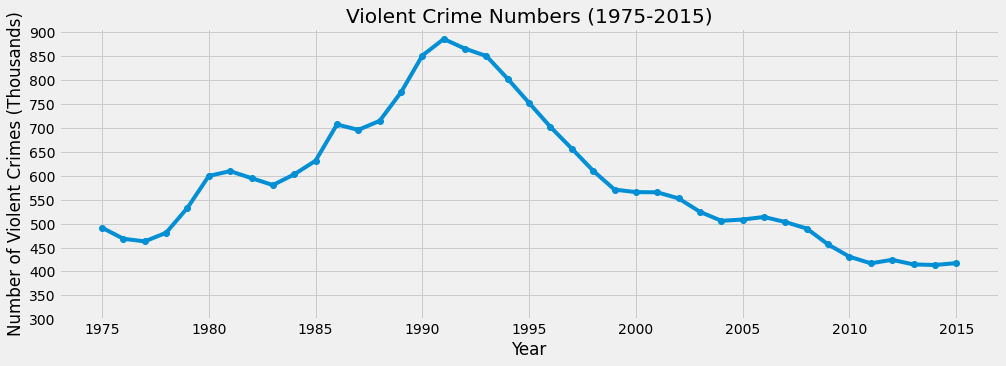

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(line_graph_1['report_year'], line_graph_1['num_violent_crimes']/1000, marker = 'o')
plt.title('Violent Crime Numbers (1975-2015)')
plt.xlabel('Year')                  
plt.ylabel('Number of Violent Crimes (Thousands)')
plt.xticks(np.arange(1975,2020,5))
plt.yticks(np.arange(300,950,50));

From this visualization, we learned that from the late 70s through the early 90s, there was a gradual increase each year in the number of violent crimes reported across the reporting jurisdictions, followed by a decline in the number of crimes reported from the early 90s through the mid 2010s.

In 1975, there were around 500 thousand violent crimes reported, and by 1991, there were around 900 thousand reported. From 1991-1993, this trend began to turn around, with the number of violent crimes declining roughly 40-50 thousand during the period.

From 1993 until 1999, the number of violent crimes per year declined quite linearly, by roughly 50,000 per year. Following this sharp decline in the previous six years, there was a brief period from 1999 to 2002 in which the number of crimes reported remained relatively flat, at roughly 560-570 thousand. Finally, from 2002 to 2015, we saw that the number of crimes reported decreased from roughly 550,000 to just over 400,000, in the reported jurisdictions.

Now that we had looked at the number of violent crimes across each of the years in the dataset, we were curious as to the breakdown of the types of violent crimes included in the reports by each jurisdiction every year. Given that there was a general increase in violent crimes from 1975 to 1991, followed by a decrease from 1991 to 2015, we were curious how the various types of violent crimes reported trended during that same period.

### Q2: During 1975-2015, how do the 4 types of violent crimes compare in their number of reported instances?

In [ ]:
#The following sequel query was run prior to creating our second visualization so that we could get the total 
#number of each of the violent crime types reported for each year.

sql_statement8 = """SELECT report_year, SUM(homicides) AS num_homicides, SUM(rapes) AS num_rapes, SUM(assaults) AS num_assaults, SUM(robberies) AS num_robberies
                   FROM reports
                   WHERE agency_jurisdiction != 'United States' AND agency_jurisdiction NOT LIKE '%DC'
                   GROUP BY report_year;"""

line_graph_2 = pd.read_sql_query(sql_statement8, conn)
line_graph_2

,report_year,num_homicides,num_rapes,num_assaults,num_robberies
0,1975,8911.0,23837.0,176297.0,282258.0
1,1976,8138.0,23420.0,176184.0,260560.0
2,1977,8217.0,25954.0,183999.0,244575.0
3,1978,8462.0,27701.0,195043.0,249627.0
4,1979,9705.0,31005.0,212984.0,279100.0
5,1980,10477.0,32563.0,225719.0,330787.0
6,1981,10063.0,31628.0,220241.0,347632.0
7,1982,9393.0,30260.0,225316.0,329957.0
8,1983,8880.0,31394.0,228677.0,311532.0
9,1984,8409.0,33313.0,258151.0,302929.0


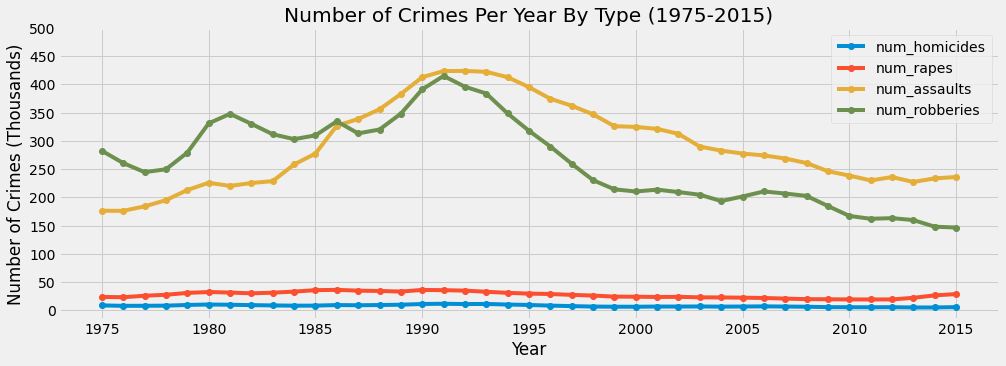

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(line_graph_2['report_year'], line_graph_2['num_homicides']/1000, marker='o', label = 'num_homicides')
plt.plot(line_graph_2['report_year'], line_graph_2['num_rapes']/1000, marker='o', label = 'num_rapes')
plt.plot(line_graph_2['report_year'], line_graph_2['num_assaults']/1000, marker='o', label = 'num_assaults')
plt.plot(line_graph_2['report_year'], line_graph_2['num_robberies']/1000, marker='o', label = 'num_robberies')   
plt.title('Number of Crimes Per Year By Type (1975-2015)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Crimes (Thousands)')
plt.xticks(np.arange(1975,2020,5))
plt.yticks(np.arange(0,550,50));

Like our overall violent crime reporting in question 1, a similar trend was exhibited in the number of crimes for the type "assaults" and "robberies". We once again see an increase in the number of reported crimes from 1975 to 1991, followed by a decrease from 1991 to 2015. However, as compared to the aggregate figures presented in question 1, we can see that the degree to which the number of reported crimes increases or decreases is generally much less than that of the aggregate. Over the 40 year period for which data was presented, the number of assaults rose from roughly 175,000 per year to nearly 250,000 per year, and the number of robberies declined from roughly 280,000 per year to 150,000 per year, with a wide variation over the four decades in the crime figures reported.

In addition, we found it very interesting that the number of homicides and rapes reported remains relatively stable over the entire period, with the number of rapes reported by the jurisdications always surpassing the number of homicides. Both types of crimes never reported a cumulative figure greater than 50,000 during the 40 year period.

Having explored the crime data using the previous two visualizations and taken a look at the trends in the number of crimes reported across the 40 year period, we were now curious about what individual state reporting showed. This lead us to ask the following question.

### Q3:  What is the total number of crimes per state? Limit to the top 10 states with the greatest number of violent crimes. 

In [ ]:
#Before creating this visualization, we first needed to create our state_code column so that we could group by
#each state, aggregating our crime data that is currently presented by jurisdictions. We once again excluded
#the records with a jurisidiction of the "United States" and "Washington, DC".

sql_statement6 = """SELECT SUBSTR(agency_jurisdiction, -2, 2) AS state_code, SUM(violent_crimes) AS num_violent_crimes
                    FROM reports
                    WHERE agency_jurisdiction != 'United States' AND agency_jurisdiction NOT LIKE '%DC'
                    GROUP BY state_code
                    ORDER BY num_violent_crimes DESC
                    LIMIT 10;"""

bar = pd.read_sql_query(sql_statement6, conn)
bar

,state_code,num_violent_crimes
0,NY,4590104.0
1,CA,3990220.0
2,TX,2209217.0
3,IL,1960886.0
4,FL,1503422.0
5,MD,1136606.0
6,PA,921855.0
7,MI,918003.0
8,MO,691160.0
9,OH,670595.0


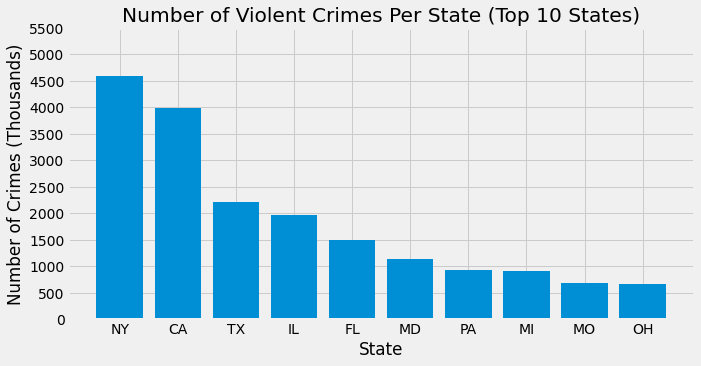

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(bar['state_code'], bar['num_violent_crimes']/1000)
plt.ylabel('Number of Crimes (Thousands)')
plt.yticks(np.arange(0,6000,500))
plt.xlabel('State')
plt.title('Number of Violent Crimes Per State (Top 10 States)');

From the bar chart we created for this question, we found that of the top 10 states reported, New York and California had the highest number of violent crimes reported, significantly surpassing the next closest state, Texas. With approximately 4.5 million and 4 million violent crimes reported respectively, New York and California towered over the remaining 8 states, with Texas only reporting approximately 2.2 million crimes over the same period. 
When looking at the overall distribution for the 10 highest reporting states, we see that the data is skewed to the right, with the tail end of the chart much closer together in regards to crime numbers reported.

Wanting to further explore the relationship between each state and its reported number of crimes, we decided to also create a visualization to explore the relationship between the number of crimes per state, and the population of that state for the year 2015.

In [ ]:
#Because NY, CA and TX have state populations that far exceed the other states in our database, we elected
#to remove these states from the following scatter plot analysis so as to remove the outlier effect imposed
#by their much larger values. In addition, we chose to look at 2015 specifically so we could get the best
#look at the relationship between the variables.

sql_statement9 = """SELECT SUBSTR(agency_jurisdiction, -2, 2) AS state_code, SUM(population) AS state_population, SUM(violent_crimes) AS num_violent_crimes
                    FROM reports
                    WHERE report_year = 2015 AND state_code NOT IN ('NY', 'CA', 'TX') AND agency_jurisdiction != 'United States' AND agency_jurisdiction NOT LIKE '%DC'
                    GROUP BY state_code
                    ORDER BY state_population DESC;"""

population = pd.read_sql_query(sql_statement9, conn)
population

,state_code,state_population,num_violent_crimes
0,MD,3144490.0,14762.0
1,FL,3133280.0,21097.0
2,IL,2728695.0,24663.0
3,AZ,2560453.0,14705.0
4,PA,1874680.0,18299.0
5,NV,1562134.0,14383.0
6,VA,1554497.0,1600.0
7,OH,1534878.0,7392.0
8,NC,1316180.0,7624.0
9,TN,1315965.0,18694.0


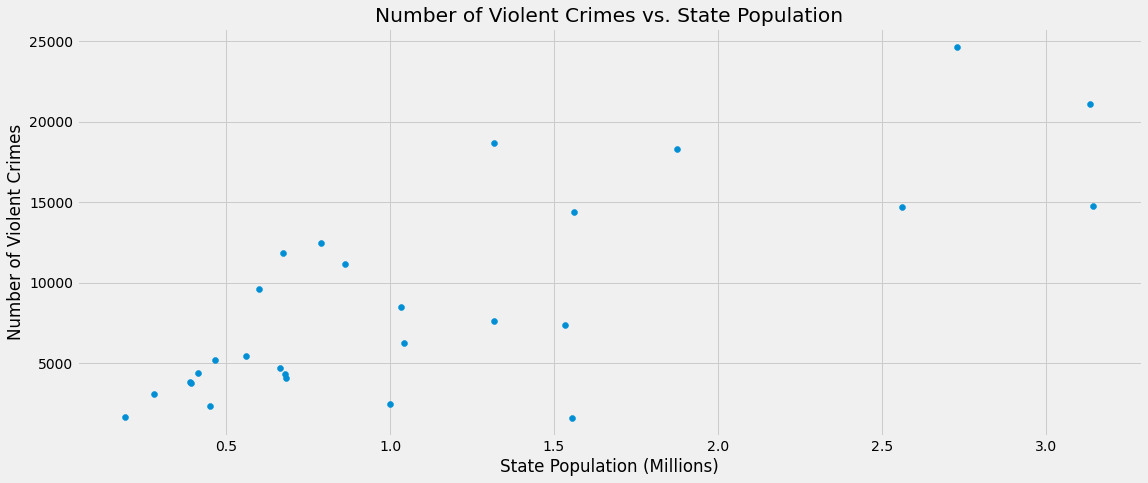

In [ ]:
plt.figure(figsize = (17, 7))
plt.scatter(population['state_population']/1000000, population['num_violent_crimes'])
plt.title('Number of Violent Crimes vs. State Population')
plt.ylabel('Number of Violent Crimes')
plt.xlabel('State Population (Millions)');

In [ ]:
corr_df = population.corr()
corr_df

,state_population,num_violent_crimes
state_population,1.000000,0.763578
num_violent_crimes,0.763578,1.000000


With this additional look at the relationship between the state populations and the number of violent crimes, we see that there is a moderately strong positive correlation between the two. With a correlation coeffcient of 0.764 resulting from this relationship, we see that generally, as the state population increases, so does the number of violent crimes. Without removing the three states, CA, NY and TX, the correlation coefficient was 0.91, indicating a strong positive relationship.

As we had just examined one potential relationship and reason for the number of violent crimes in each state, it got us thinking about what other factors might affect the number of violent crimes in each state. With this thought in mind, we collected median income data from the Federal Reserve of St. Louis.

### Q4: How do the number of violent crimes per 1,000 residents per state fluctuate based upon the median income of that state?

In [ ]:
#This query includes our join from the median income dataset. We performed an inner join as the crimes dataset
#does not include all 50 states. In addition, we calculated the crimes per 1,000 residents, and the average median income per state.

sql_statement7 = """SELECT SUBSTR(agency_jurisdiction, -2, 2) AS state_code, SUM(violent_crimes)/SUM(population) * 1000 AS crimes_per_1000 , AVG(Median_household_income) AS avg_mhi
                    FROM reports
                      INNER JOIN incomes
                      ON state_code = State
                    WHERE report_year BETWEEN 1984 AND 2015
                    GROUP BY state_code
                    ORDER BY state_code"""

scatter = pd.read_sql_query(sql_statement7, conn)
scatter

,state_code,crimes_per_1000,avg_mhi
0,AZ,7.608628,59141.06250
1,CA,10.872927,68861.71875
2,CO,7.350960,70131.53125
3,FL,14.263729,55588.18750
4,GA,24.625531,58878.50000
5,HI,2.691516,75092.40625
6,IL,18.569366,65531.31250
7,IN,11.598934,58148.75000
8,KS,7.482010,59027.53125
9,KY,5.998688,50782.75000


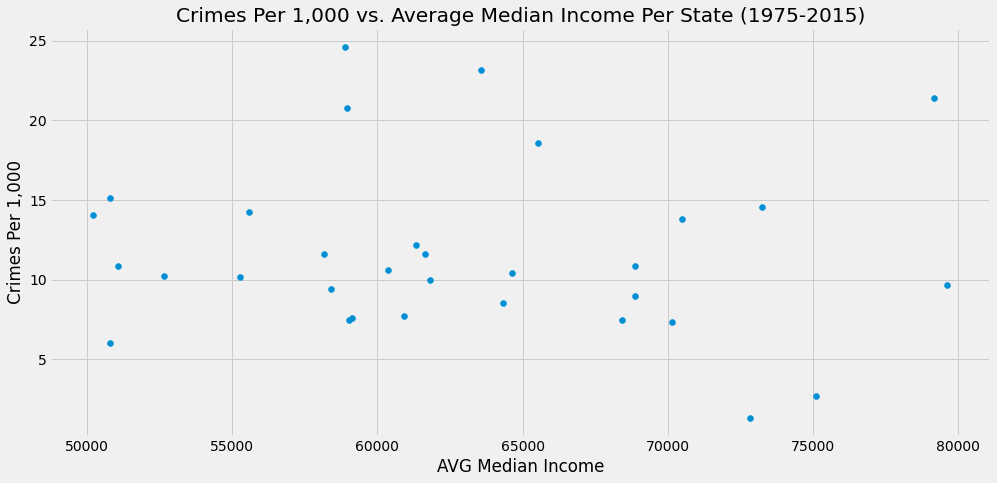

In [ ]:
plt.figure(figsize = (15, 7))
plt.scatter(scatter['avg_mhi'], scatter['crimes_per_1000'])
plt.title('Crimes Per 1,000 vs. Average Median Income Per State (1975-2015)')
plt.ylabel('Crimes Per 1,000')
plt.xlabel('AVG Median Income');

In [ ]:
corr_df = scatter.corr()
corr_df

,crimes_per_1000,avg_mhi
crimes_per_1000,1.000000,-0.087006
avg_mhi,-0.087006,1.000000


Looking at the relationship between the AVG median income of a state, and the crimes reported per 1,000 residents across the period, we found that there was basically no relationship between the two variables. With a correlation coefficient of -0.087, there was a slightly negative relationship between the average median income and crimes per 1,000 residents, but nothing significant. From this, we can see that in general, as the average median income increases, there is a very slight decline in the crimes per 1,000 residents.

This surprised us and led us to question if there was maybe additional data or resources we could get hold of in the future to better explore the relationship. In addition, having looked at two separate factors affecting crime numbers and their correlations, our interest was peaked in further exploring variables related to the number of crimes reported in the future.

As we began to wrap up our analysis of this data for the purposes of this project, one final question peaked our interest. We were curious to see what the distribution of the crime rates per 1,000 residents we had just calculated was for the states.

### Q5: What percentage of states reported a crime rate per 1,000 residents within similar ranges of each other?

In [ ]:
sql_statement5 = """SELECT SUBSTR(agency_jurisdiction, -2, 2) AS state_code, SUM(violent_crimes)/SUM(population) * 1000 AS crimes_per_1000
                   FROM reports
                   WHERE agency_jurisdiction != 'United States' AND state_code != 'DC'
                   GROUP BY state_code
                   ORDER BY state_code;"""


histogram = pd.read_sql_query(sql_statement5, conn)
histogram

,state_code,crimes_per_1000
0,AZ,7.485028
1,CA,11.120869
2,CO,7.667245
3,FL,14.234120
4,GA,23.811811
5,HI,2.685156
6,IL,16.552157
7,IN,10.984621
8,KS,7.077712
9,KY,5.998688


In [ ]:
num_rows = len(histogram['crimes_per_1000'])
multiplier = np.ones(num_rows) * 100/num_rows
multiplier

array([3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125,
       3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125,
       3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125, 3.125,
       3.125, 3.125, 3.125, 3.125, 3.125])

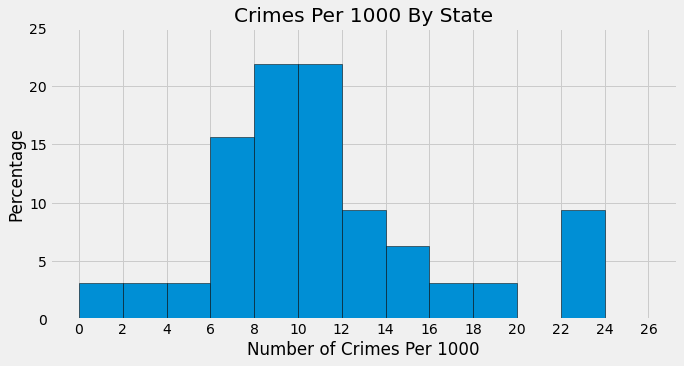

In [ ]:
plt.figure(figsize = (10,5))
plt.hist(histogram['crimes_per_1000'], bins = np.arange(0,27, 2), edgecolor = 'black', weights = multiplier)
plt.title('Crimes Per 1000 By State')
plt.xlabel('Number of Crimes Per 1000')
plt.ylabel('Percentage')
plt.yticks(np.arange(0,26,5))
plt.xticks(np.arange(0,27,2));

The histogram we created to showcase this final question provided us with some interesting insights into the distribution of the crimes per 1,000 across the states reported. In general, roughly 60% of the states reported had a crime rate per 1,000 residents of 6 to 12, with a further 9% of states having a crime rate per 1,000 of 12 to 14, and 22-24 crimes per 1,000. 

From this, we gathered that the majority of states tend to have very similar crimes per 1,000 figures, and likely have similar relationships between their population and total number of violent crimes reported.

This is another example of a topic we would like to explore in greater detail in the future, provided we had additional data and time.

---

## Conclusion

Bringing our project to a close, we gathered very interesting information in regards to our datasets and the crime rates of different states during the collected time period versus median household incomes for each state. Overall, we found that the number of crimes committed in different states was affected by the population of the state, but not by the median household income in that state. As stated previously, if we had more time, we would have liked to look into other datasets of other variables that may have affected the crime rates of each state. We also thought it would be interesting to further explore other datasets about crime rates per 1,000 residents regarding other types of crimes or even more recent time periods to see how it has been changing recently with world events. There is still more we would like to explore with our datasets if we had the extra time and additional datasets, but for now, the findings of our analysis provides us with a strong foundation and understanding of the data obtained. 